In [2]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# import the dataset 
dataset2008 = pd.read_excel( 'all_alpha_08.xls' ) 
dataset2009 = pd.read_excel( 'all_alpha_09.xls' ) 
dataset2010 = pd.read_excel( 'all_alpha_10.xls' ) 
dataset2011 = pd.read_excel( 'all_alpha_11.xlsx' ) 
dataset2012 = pd.read_excel( 'all_alpha_12.xlsx' ) 
dataset2013 = pd.read_excel( 'all_alpha_13.xlsx' ) 
dataset2014 = pd.read_excel( 'all_alpha_14.xlsx' ) 
dataset2015 = pd.read_excel( 'all_alpha_15.xlsx' ) 
dataset2016 = pd.read_excel( 'all_alpha_16.xlsx' ) 
dataset2017 = pd.read_excel( 'all_alpha_17.xlsx' ) 
dataset2018 = pd.read_excel( 'all_alpha_18.xlsx' )

In [4]:
# Shape of datasets 
print( '2008 ->', dataset2008.shape)
print( '2009 ->', dataset2009.shape)
print( '2010 ->', dataset2010.shape)
print( '2011 ->', dataset2011.shape)
print( '2012 ->', dataset2012.shape)
print( '2013 ->', dataset2013.shape)
print( '2014 ->', dataset2014.shape)
print( '2015 ->', dataset2015.shape)
print( '2016 ->', dataset2016.shape)
print( '2017 ->', dataset2017.shape)
print( '2018 ->', dataset2018.shape)


2008 -> (2404, 18)
2009 -> (2561, 17)
2010 -> (2326, 17)
2011 -> (2171, 17)
2012 -> (2252, 17)
2013 -> (2397, 18)
2014 -> (2517, 18)
2015 -> (2653, 18)
2016 -> (2589, 18)
2017 -> (2589, 18)
2018 -> (2713, 18)


In [5]:
# Common columns across the datasets and their datatype.

# 'Model'                - string
# 'Displ'                - float
# 'Cyl'                  - float
# 'Trans'                - string
# 'Drive'                - string
# 'Fuel '                - string
# 'Stnd'                 - string
# 'Underhood ID'         - string
# 'Veh Class'            - string
# 'Air Pollution Score'  - float
# 'City MPG'             - float
# 'Hwy MPG'              - float
# 'Cmb MPG'              - float
# 'Greenhouse Gas Score' - float
# 'SmartWay'             - string
# 'Year'                 - int


## Cleaning

Here, we clean all 11 datasets and combine all to get a master dataset. It is done by defining a function which will clean the datasets. Since all 11 datasets are similar, one function can be used to clean all.


In [7]:
# Define a function to clean the datasets 
def function_clean_data(dataset, year):

    # Create copy of the dataset 
    dataset_nonull = dataset.copy()

    # Select the required columns 
    dataset_nonull = dataset_nonull.loc[:, ['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Stnd', 'Underhood ID', 'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score' , 'SmartWay' ]]

    # Add a column Year and value as year to identify the dataset year 
    dataset_nonull[ 'Year' ] = year

    # Drop duplicates from the dataset 
    dataset_nonull.drop_duplicates(keep='first', inplace=True)

    # Drop Null values 
    dataset_nonull = dataset_nonull.drop(dataset_nonull[dataset_nonull.isnull().any(axis=1)].index, axis=0)

    # In dataset2008, number of cylinders is string eg: '(6 cyl)', convert it to float
    if (year == 2008):
        dataset_nonull.loc[:, 'Cyl'] = dataset_nonull.loc[ : , 'Cyl'].str[1: -5].astype( 'float64' )

    # In some datasets some values are marked as MOD - which we will remove.
    dataset_nonull = dataset_nonull.drop(dataset_nonull[ (dataset_nonull == 'Mod').any(axis = 1)].index, axis=0)

    # Create a new dataframe for formatteddataset 
    dataset_formatted = dataset_nonull.copy()

    # Here, we will format all 11 datasets to have the same datatype and consistent values 
    splitted_list2 = []
    for i in dataset_nonull[dataset_nonull.loc[:, 'Fuel'].str.contains('/')].index: 
        record = dataset_nonull.loc[i, :] 
        record1 = [record[0], record[1], record[2], record[3], record[4], str(record[5]).split( '/' ) [0], record[6], record[7], record[8], str(record[9]).split( '/')[0], str(record[10]).split( '/')[0], str(record[11]).split( '/' ) [0], str(record[12]).split('/')[0], str(record[13]).split('/')[0], record[14], record[15]] 
        record2 = [record[0], record[1], record[2], record[3], record[4], str(record[5]).split( '/')[len(str(record[5]).split( '/'))-1], record[6], record[7], record[8], str(record[9]).split( '/')[len(str(record[9]).split( '/'))-1], str(record[10]).split('/')[len(str(record[10]).split( '/'))-1], str(record[11]).split( '/')[len(str(record[11]).split( '/'))-1], str(record[12]).split('/')[len(str(record[12]).split( '/'))-1], str(record[13]).split( '/')[len(str(record[13]).split('/'))-1], record[14], record[15]] 
        splitted_list2.append(record1) 
        splitted_list2.append(record2) 
    dataset_formatted = dataset_nonull.copy() 
    dataset_formatted = dataset_formatted.drop(dataset_nonull[dataset_nonull.loc[:, 'Fuel'].str.contains( '/')].index, axis=0) 
    dataset_formatted = dataset_formatted.append(pd.DataFrame(splitted_list2, columns = dataset_nonull.columns) )

    # Standardise the datatype of the columns
    dataset_formatted.loc[:, 'Displ'] = dataset_formatted.loc[ :, 'Displ'].astype( 'float64' ) 
    dataset_formatted.loc[ :, 'Cyl'] = dataset_formatted.loc[ : , 'Cyl'].astype( 'float64') 
    dataset_formatted.loc[:, 'Air Pollution Score'] = dataset_formatted.loc[ :, 'Air Pollution Score'].astype( 'float64' ) 
    dataset_formatted.loc[ :, 'City MPG'] = dataset_formatted.loc[ :, 'City MPG' ].astype( 'float64' ) 
    dataset_formatted.loc[ :, 'Hwy MPG' ] = dataset_formatted.loc[ : , 'Hwy MPG' ].astype( 'float64' ) 
    dataset_formatted.loc[ :, 'Cmb MPG' ] = dataset_formatted.loc[ : , 'Cmb MPG' ].astype( 'float64' ) 
    dataset_formatted.loc[ :, 'Greenhouse Gas Score'] = dataset_formatted.loc[ : , 'Greenhouse Gas Score'].astype( 'float64')

    # Indexing of the dataset is corrected after droppping and cleaning is done 
    dataset_formatted.reset_index(inplace = True, drop = True)

    return dataset_formatted


In [8]:
# We run the cleaning function on all 11 datasets 
dataset_list = [dataset2008, dataset2009, dataset2010, dataset2011, dataset2012, dataset2013, dataset2014, dataset2015, dataset2016, dataset2017, dataset2018] 
year_list = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018] 
formatted_dataset_list = [] 
for i in range(0,11) :
    formatted_dataset = function_clean_data(dataset_list[i], year_list[i]) 
    formatted_dataset_list.append(formatted_dataset)


In [9]:
# Merge all the cleaned datasets into one master dataset to do analysis 
master_dataset = formatted_dataset_list[0] 
for i in range(1,11):
    master_dataset = master_dataset.append(formatted_dataset_list[i]) 
master_dataset.reset_index(inplace = True, drop = True)


In [12]:
print('Shape of the master dataset:')
print(master_dataset.shape)
print('----------------------------------------------------')
print('Dataset details')
display(master_dataset.describe())
print('----------------------------------------------------')
print('Dataset info')
print(master_dataset.info())

Shape of the master dataset:
(26208, 16)
----------------------------------------------------
Dataset details


,Displ,Cyl,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,Year
count,26208.000000,26208.000000,26208.000000,26208.000000,26208.000000,26208.000000,26208.000000,26208.000000
mean,3.324531,5.800748,5.773237,19.659646,26.677999,22.210966,4.906174,2013.159570
std,1.359056,1.885750,1.346258,8.188357,7.922897,7.958430,1.972667,3.200304
min,0.600000,2.000000,1.000000,7.000000,11.000000,9.000000,0.000000,2008.000000
25%,2.000000,4.000000,5.000000,15.000000,22.000000,18.000000,4.000000,2010.000000
50%,3.000000,6.000000,6.000000,18.000000,26.000000,21.000000,5.000000,2013.000000
75%,4.000000,6.000000,6.000000,22.000000,30.000000,25.000000,6.000000,2016.000000
max,8.400000,16.000000,9.500000,145.000000,121.000000,133.000000,10.000000,2018.000000


----------------------------------------------------
Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26208 entries, 0 to 26207
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 26208 non-null  object 
 1   Displ                 26208 non-null  float64
 2   Cyl                   26208 non-null  float64
 3   Trans                 26208 non-null  object 
 4   Drive                 26208 non-null  object 
 5   Fuel                  26208 non-null  object 
 6   Stnd                  26208 non-null  object 
 7   Underhood ID          26208 non-null  object 
 8   Veh Class             26208 non-null  object 
 9   Air Pollution Score   26208 non-null  float64
 10  City MPG              26208 non-null  float64
 11  Hwy MPG               26208 non-null  float64
 12  Cmb MPG               26208 non-null  float64
 13  Greenhouse Gas Score  26208 non-null  float64
 14  Smar

In [14]:
# Check for incongruenciaes in values 
print('Distinct values in Fuel column')
print(master_dataset.loc[ :, 'Fuel' ].value_counts()) 
print('-----------------------------------------------------')
print('Distinct values in SmartWay column')
print(master_dataset. loc[ :, 'SmartWay' ].value_counts())
print('-----------------------------------------------------')
print('There are some incongruencies in the data here such as typo and casing issues.')

# Fix the typo and casing 
# Fuel column 
master_dataset.loc[:, 'Fuel'].replace(to_replace = 'ethanol', value = 'Ethanol', inplace = True ) 
master_dataset.loc[ :, 'Fuel'].replace(to_replace ='gas', value ='Gas' , inplace = True ) 
master_dataset.loc[:, 'Fuel'].replace(to_replace = 'Electricty' , value ='Electricity', inplace = True ) 
master_dataset.loc[:,'Fuel'].replace(to_replace= 'diesel', value = 'Diesel', inplace = True )

#SmartWay column 
master_dataset.loc[:, 'SmartWay'].replace(to_replace = 'no', value = 'No', inplace = True )
master_dataset.loc[:, 'SmartWay'].replace(to_replace = 'yes', value ='Yes', inplace = True )

print('Distinct values in Fuel column after fixing typo and casing issues')
print('-----------------------------------------------------')
print(master_dataset.loc[ :, 'Fuel' ].value_counts()) 
print('-----------------------------------------------------')
print(master_dataset. loc[ :, 'SmartWay' ].value_counts())

Distinct values in Fuel column
Gasoline       22993
Ethanol         1397
Gas             1393
Electricity      207
Diesel           192
CNG               26
Name: Fuel, dtype: int64
-----------------------------------------------------
Distinct values in SmartWay column
No       20534
Yes       5497
Elite      177
Name: SmartWay, dtype: int64
-----------------------------------------------------
There are some incongruencies in the data here such as typo and casing issues.
Distinct values in Fuel column after fixing typo and casing issues
-----------------------------------------------------
Gasoline       22993
Ethanol         1397
Gas             1393
Electricity      207
Diesel           192
CNG               26
Name: Fuel, dtype: int64
-----------------------------------------------------
No       20534
Yes       5497
Elite      177
Name: SmartWay, dtype: int64


In [11]:
display(master_dataset.head())

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Year
0,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,U2,8HNXT03.7PKR,SUV,7.0,15.0,20.0,17.0,4.0,No,2008
1,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,B5,8HNXT03.7PKR,SUV,6.0,15.0,20.0,17.0,4.0,No,2008
2,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,U2,8HNXT02.3DKR,SUV,7.0,17.0,22.0,19.0,5.0,No,2008
3,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,B5,8HNXT02.3DKR,SUV,6.0,17.0,22.0,19.0,5.0,No,2008
4,ACURA RL,3.5,6.0,Auto-S5,4WD,Gasoline,U2,8HNXV03.5HKR,midsize car,7.0,16.0,24.0,19.0,5.0,No,2008


## Exploratory Data Analysis



Is there any relation on Air Pollution Score and Greenhouse Gas Score by Fuel?


(0.0, 10.0)

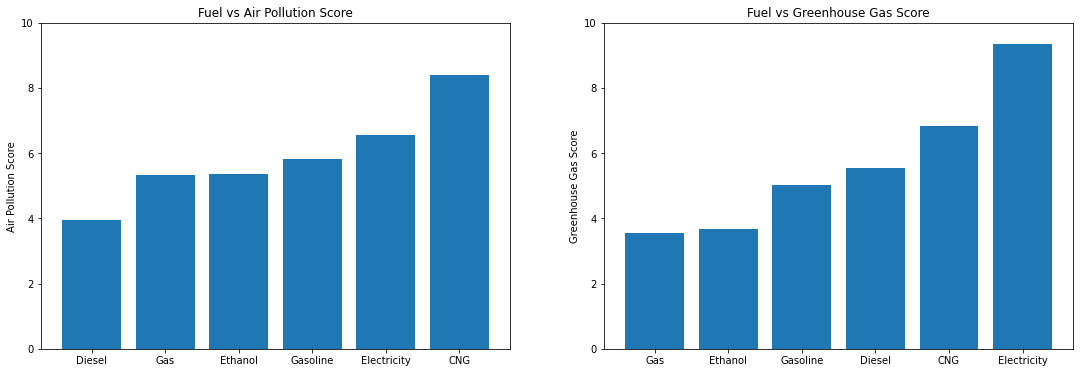

In [20]:
# Fuel vs Air Pollution Score grouping data
fuel_airpollutionscore_group = master_dataset.loc[ :, ['Fuel', 'Air Pollution Score' ]].groupby([ 'Fuel']).mean().sort_values( 'Air Pollution Score') 

# Fuel vs Greenhouse Gas Score grouping data
fuel_grgascore_group = master_dataset.loc[ : , [ 'Fuel', 'Greenhouse Gas Score' ]].groupby([ 'Fuel']).mean().sort_values('Greenhouse Gas Score')

# plot the grouped data
fig, (airpl, grgas) = plt.subplots(1,2) 
fig.set_size_inches(18.5, 6)

airpl.bar(fuel_airpollutionscore_group[ 'Air Pollution Score'].index, fuel_airpollutionscore_group['Air Pollution Score'].values) 
airpl.set_title('Fuel vs Air Pollution Score') 
airpl.set_ylabel( 'Air Pollution Score') 
airpl.set_ylim(0,10)

grgas.bar(fuel_grgascore_group[ 'Greenhouse Gas Score' ].index, fuel_grgascore_group['Greenhouse Gas Score' ].values) 
grgas.set_title('Fuel vs Greenhouse Gas Score') 
grgas.set_ylabel( 'Greenhouse Gas Score') 
grgas.set_ylim(0,10)

Is there any relation on City, Highway and combined mileage by Fuel?

(0.0, 100.0)

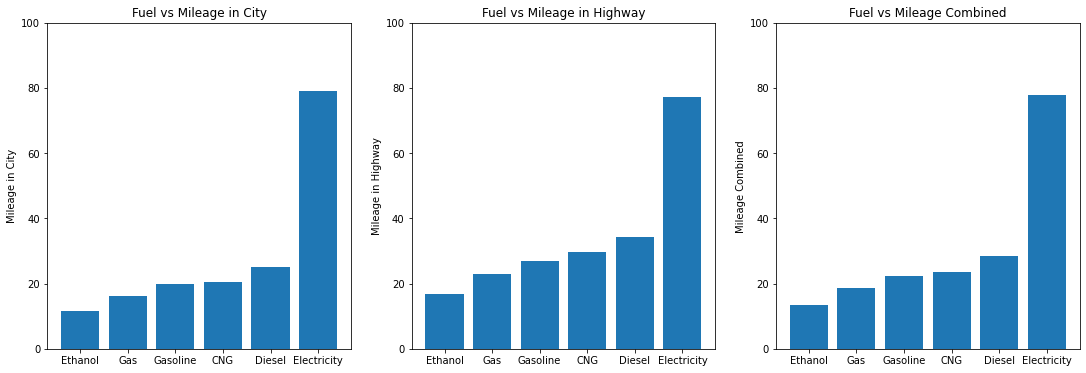

In [21]:
# Fuel vs Mileage in City grouping data
fuel_citympg_group = master_dataset.loc[ :, [ 'Fuel', 'City MPG' ]].groupby (['Fuel']).mean().sort_values ( 'City MPG' ) 

# Fuel vs Mileage in Highway grouping data
fuel_hwympg_group = master_dataset.loc[:, [ 'Fuel', 'Hwy MPG' ]].groupby([ 'Fuel']).mean().sort_values ('Hwy MPG') 

# Fuel vs Mileage in Combined grouping data
fuel_cmbmpg_group = master_dataset.loc[ :, [ 'Fuel', 'Cmb MPG' ]].groupby([ 'Fuel']).mean().sort_values ( 'Cmb MPG' ) 
 
    
# plot the grouped data
fig, (citympg, hwympg, commpg) = plt.subplots (1,3) 
fig.set_size_inches(18.5,6)

citympg.bar(fuel_citympg_group[ 'City MPG'].index, fuel_citympg_group[ 'City MPG'].values) 
citympg.set_title( 'Fuel vs Mileage in City') 
citympg.set_ylabel ( 'Mileage in City' ) 
citympg.set_ylim(0,100)

hwympg.bar (fuel_hwympg_group[ 'Hwy MPG' ].index, fuel_hwympg_group[ 'Hwy MPG' ].values) 
hwympg.set_title('Fuel vs Mileage in Highway' ) 
hwympg.set_ylabel( 'Mileage in Highway' ) 
hwympg.set_ylim(0,100)

commpg.bar (fuel_cmbmpg_group[ 'Cmb MPG' ].index, fuel_cmbmpg_group[ 'Cmb MPG' ].values) 
commpg.set_title('Fuel vs Mileage Combined') 
commpg.set_ylabel ( 'Mileage Combined' ) 
commpg.set_ylim(0,100)

Are more unique models using alternative fuels in 2018 compared to 2017? By how much?

In [23]:
dataset2018 = master_dataset[master_dataset.loc[:, 'Year' ] == 2018] 
grouped_model_fuel = pd.DataFrame(dataset2018.groupby([ 'Model', 'Fuel']).count().index.values.tolist()) 
grouped_model_fuel.groupby([0]).count().values.mean() 
print('Average number of different fuels used by Model in 2018: ',grouped_model_fuel.groupby([0]).count().values.mean( ) )

datasettemp = master_dataset[master_dataset.loc[:, 'Year' ] == 2017] 
grouped_model_fuel = pd.DataFrame(datasettemp.groupby([ 'Model', 'Fuel']).count().index.values.tolist( )) 
grouped_model_fuel.groupby([0]).count().values.mean() 
print('Average number of different fuels used by Model in 2017: ', grouped_model_fuel.groupby([0]).count().values.mean())

print('---------------------------------')
print('More alternative fuels are being used in 2018 compared to 2017')

Average number of different fuels used by Model in 2018:  1.1537242472266245
Average number of different fuels used by Model in 2017:  1.144278606965174
---------------------------------
More alternative fuels are being used in 2018 compared to 2017


How much have vehicle classes improved in fuel economy (increased in mpg) per year?

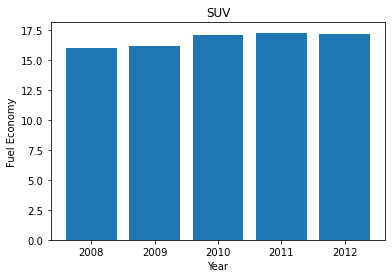

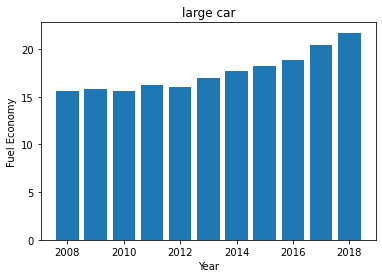

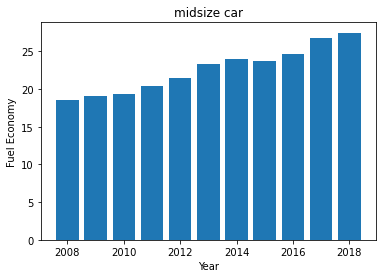

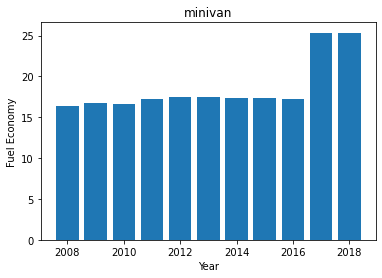

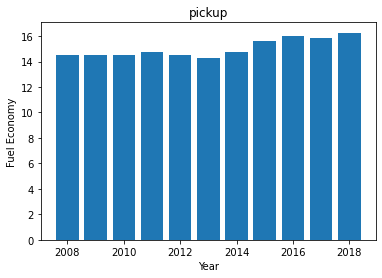

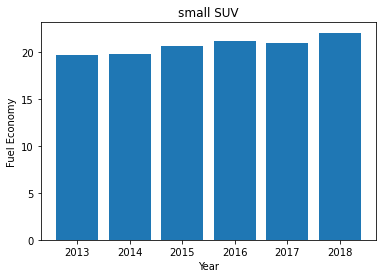

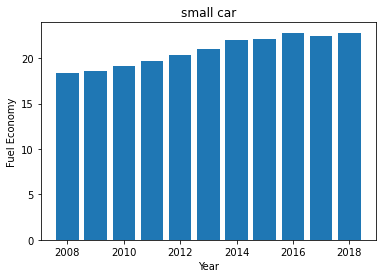

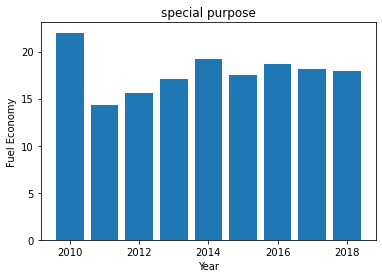

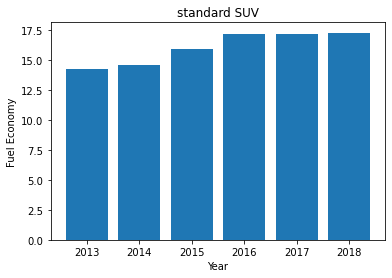

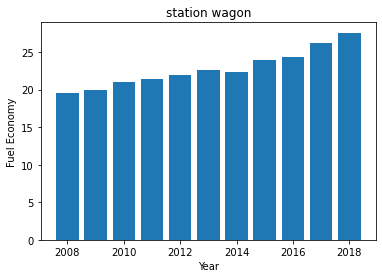

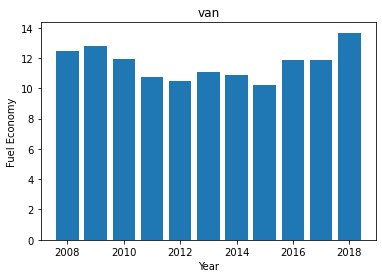

In [24]:
# group different class of vehicles by year
grouped_fueleconomy_year = pd.DataFrame(master_dataset.loc[:,[ 'Veh Class', 'City MPG', 'Year']].groupby ([ 'Veh Class', 'Year' ]).mean().index.tolist()) 
grouped_fueleconomy_year[2] = pd.DataFrame(master_dataset.loc[ : , [ 'Veh Class', 'City MPG', 'Year']].groupby([ 'Veh Class', 'Year' ]).mean( ).values.tolist( )) 
grouped_fueleconomy_year.columns = [ 'Veh Class', 'Year', 'Avg City MPG' ]

# plot for each class of vehicle
for i in grouped_fueleconomy_year.loc[ :, 'Veh Class' ].unique( ):
    data = grouped_fueleconomy_year [grouped_fueleconomy_year.loc[ : , 'Veh Class' ] == i] 
    plt.bar(data.loc[:, 'Year' ], data. loc[ : , 'Avg City MPG' ]) 
    plt.title(i) 
    plt.xlabel('Year') 
    plt.ylabel('Fuel Economy') 
    plt.show()


What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)

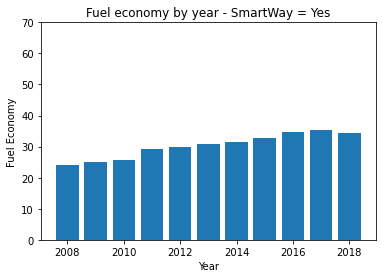

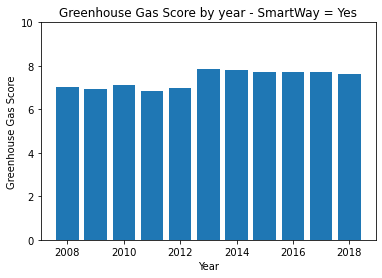

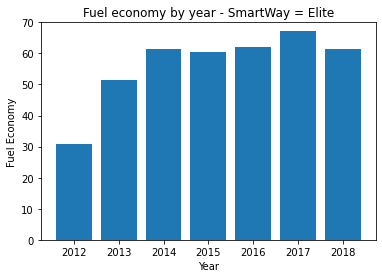

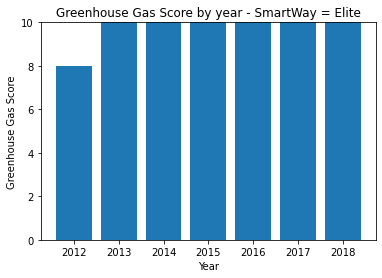

In [25]:
# group smartway vehicles on fuel economy, green house gas score by year

# Fuel economy by year - SmartWay = Yes
grouped_smartway_yes_year = pd.DataFrame(master_dataset[master_dataset.loc[ :, 'SmartWay' ] == 'Yes'].loc[ : , [ 'Cmb MPG', 'Greenhouse Gas Score', 'Year' ]].groupby ([ 'Year' ]).mean().values.tolist()) 

# Greenhouse Gas Score by year - SmartWay = Yes
grouped_smartway_yes_year.index = master_dataset[master_dataset.loc[ :, 'SmartWay'] == 'Yes' ].loc[ : , [ 'Cmb MPG', 'Greenhouse Gas Score', 'Year' ]].groupby([ 'Year' ]).mean().index 

# Fuel economy by year - SmartWay = Elite
grouped_smartway_elite_year = pd.DataFrame(master_dataset[master_dataset.loc[ : , 'SmartWay' ] =='Elite' ].loc[ : , [ 'Cmb MPG' , 'Greenhouse Gas Score', 'Year' ]].groupby([ 'Year' ]).mean().values.tolist( )) 

# Greenhouse Gas Score by year - SmartWay = Elite
grouped_smartway_elite_year.index = master_dataset[master_dataset. loc[:, 'SmartWay'] == 'Elite' ].loc[ : , [ 'Cmb MPG', 'Greenhouse Gas Score' , 'Year' ]].groupby([ 'Year' ]).mean( ).index

# plot the grouped data
plt.bar (grouped_smartway_yes_year.index, grouped_smartway_yes_year.loc[ : , 0]) 
plt.title( 'Fuel economy by year - SmartWay = Yes' ) 
plt.xlabel( 'Year' ) 
plt.ylabel( 'Fuel Economy' ) 
plt.ylim(0,70) 
plt.show()

plt.bar(grouped_smartway_yes_year.index, grouped_smartway_yes_year.loc[ : , 1]) 
plt.title( 'Greenhouse Gas Score by year - SmartWay = Yes') 
plt.xlabel( 'Year' ) 
plt.ylabel( 'Greenhouse Gas Score' ) 
plt.ylim(0,10) 
plt.show()

plt.bar(grouped_smartway_elite_year.index, grouped_smartway_elite_year.loc[ : ,0]) 
plt.title( 'Fuel economy by year - SmartWay = Elite' ) 
plt.xlabel( 'Year') 
plt.ylabel('Fuel Economy' ) 
plt.ylim(0,70) 
plt.show()

plt.bar(grouped_smartway_elite_year.index, grouped_smartway_elite_year.loc[:,1]) 
plt.title( 'Greenhouse Gas Score by year - SmartWay = Elite' ) 
plt.xlabel('Year' ) 
plt.ylabel( 'Greenhouse Gas Score' ) 
plt.ylim(0,10) 
plt.show( )


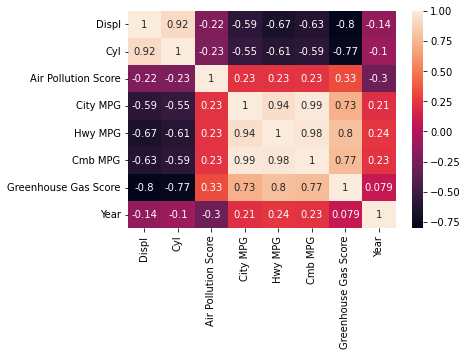

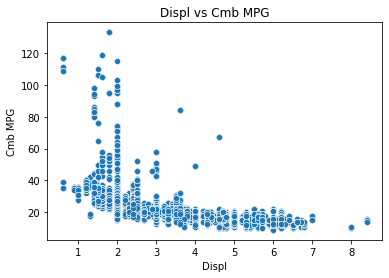

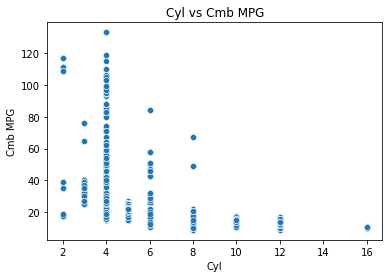

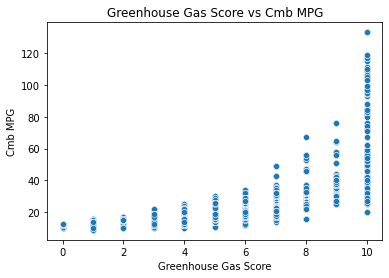

In [26]:
# What features are associated with better fuel economy (mpg)

#ploting the heatmap for correlation 
sns.heatmap(master_dataset.corr(), annot=True)
plt.show()

# From the Heatmap, we can see that Displacement and Cylinders have a high negative correlation with Combined MPG, 
# which implies that lower the Displacement and Cylinders, higher the fuel economy.
# Green gas house score has a positive correlation.

sns.scatterplot(x = 'Displ', y = 'Cmb MPG', data = master_dataset)
plt.title('Displ vs Cmb MPG')
plt.show()

sns.scatterplot(x = 'Cyl', y = 'Cmb MPG', data = master_dataset)
plt.title('Cyl vs Cmb MPG')
plt.show()

sns.scatterplot(x = 'Greenhouse Gas Score', y = 'Cmb MPG', data = master_dataset)
plt.title('Greenhouse Gas Score vs Cmb MPG')
plt.show()


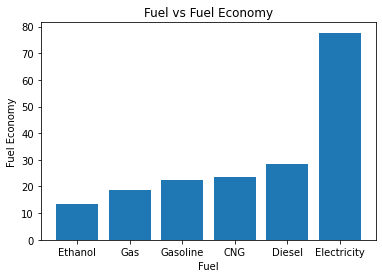

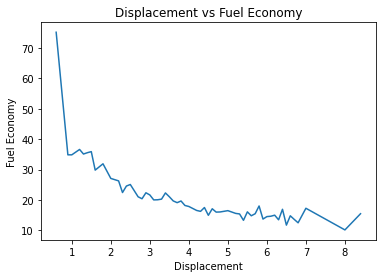

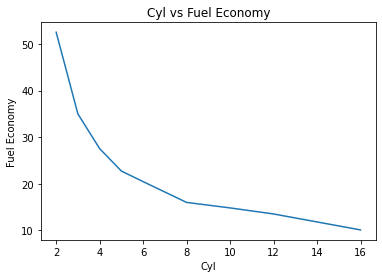

In [28]:
# Fuel vs Fuel Economy 
fuel_Cmbmpg_group = pd.DataFrame(master_dataset.loc[:, [ 'Fuel', 'Cmb MPG']].groupby([ 'Fuel']).mean().sort_values( 'Cmb MPG' ).values.tolist()) 
fuel_Cmbmpg_group.index = master_dataset.loc[:, [ 'Fuel', 'Cmb MPG' ]].groupby([ 'Fuel' ]).mean().sort_values( 'Cmb MPG' ).index.values 
plt.bar(fuel_Cmbmpg_group.index, fuel_Cmbmpg_group.loc[:,0]) 
plt.title('Fuel vs Fuel Economy' ) 
plt.xlabel( 'Fuel') 
plt.ylabel('Fuel Economy' ) 
plt.show()

# Displacement vs Fuel Economy 
displ_Cmbmpg_group = pd.DataFrame(master_dataset. loc[ :, [ 'Displ', 'Cmb MPG']].groupby([ 'Displ']).mean().sort_values ( 'Displ').values.tolist()) 
displ_Cmbmpg_group.index = master_dataset.loc[ :, [ 'Displ', 'Cmb MPG' ]].groupby([ 'Displ']).mean().sort_values( 'Displ').index.values 
plt.plot(displ_Cmbmpg_group.index, displ_Cmbmpg_group.loc[ : ,0])
plt.title('Displacement vs Fuel Economy' ) 
plt.xlabel( 'Displacement') 
plt.ylabel('Fuel Economy' ) 
plt. show()

# Number of Cylinders vs Fuel Economy
cyl_Cmbmpg_group = pd.DataFrame(master_dataset.loc[ : , [ 'Cyl', 'Cmb MPG' ]].groupby([ 'Cyl']).mean().sort_values ( 'Cyl' ).values.tolist( )) 
cyl_Cmbmpg_group.index = master_dataset.loc[ : , [ 'Cyl', 'Cmb MPG' ]].groupby([ 'Cyl' ]).mean().sort_values( 'Cyl').index.values 
plt.plot(cyl_Cmbmpg_group.index, cyl_Cmbmpg_group.loc[ : , 0]) 
plt.title( 'Cyl vs Fuel Economy' ) 
plt.xlabel( 'Cyl') 
plt.ylabel( 'Fuel Economy' ) 
plt. show()

# Model

### Clustering 

In [30]:
clustering_dataset = master_dataset. copy () 
clustering_dataset = clustering_dataset.loc[:, [ 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Veh Class', 'Air Pollution Score', 'City MPG' , 'Hwy MPG' , 'Cmb MPG' ,'Greenhouse Gas Score' , 'SmartWay' , 'Year' ]]

# importing one hot encoder, label encoder, standard scaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler 

# creating one hot encoder object 
onehotencoder = OneHotEncoder () 
labelencoder = LabelEncoder ( ) 
standardscaler = StandardScaler( )

# label encode the categorical features
clustering_dataset.loc[:, 'Trans'] = labelencoder.fit_transform(clustering_dataset.loc[ :, 'Trans' ]) 
clustering_dataset.loc[:, 'SmartWay' ] = labelencoder.fit_transform(clustering_dataset.loc[ :, 'SmartWay' ]) 
clustering_dataset.loc[:, 'Drive'] = labelencoder.fit_transform(clustering_dataset.loc[ :, 'Drive' ]) 
clustering_dataset.loc[:, 'Fuel'] = labelencoder. fit_transform(clustering_dataset.loc[ :, 'Fuel' ]) 
clustering_dataset.loc[:, 'Veh Class'] = labelencoder.fit_transform(clustering_dataset.loc[:, 'Veh Class' ])

# Scaling the data
clustering_dataset = standardscaler.fit_transform(clustering_dataset)

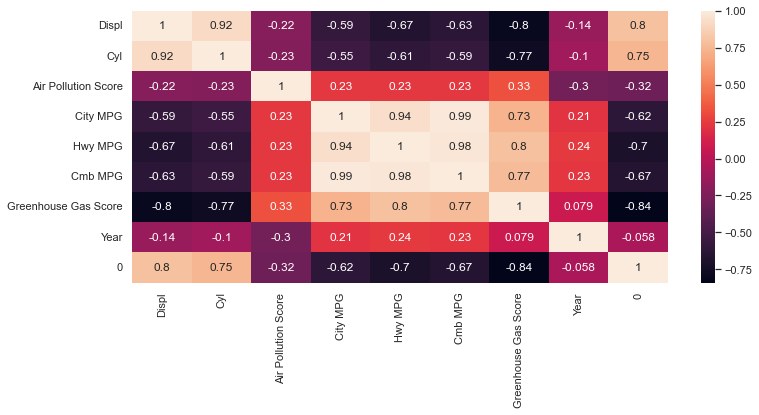

The clustered category has the most correlation with displacement, cylinders, and Green House Gas Score
-----------------------------------------
Inertia: 	 219703.71
-----------------------------------------

Average displacement in clusters: 
Cluster 1: 	 2.06
Cluster 2: 	 2.81
Cluster 3: 	 4.95
-----------------------------------------

Average cylinders in clusters: 
Cluster 1: 	 4.18
Cluster 2: 	 5.11
Cluster 3: 	 7.93
-----------------------------------------

Average Green House Gas Score in clusters: 
Cluster 1: 	 7.47
Cluster 2: 	 5.12
Cluster 3: 	 2.86


In [34]:
# K-Means clstering on the dataset
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 3, init= 'k-means++' ,n_init=10, random_state = 42) 
kmeans.fit(clustering_dataset)

# Predict the data on the same dataset
y_pred = kmeans.predict(clustering_dataset) 
clustering_dataset_cluster = pd.concat([pd.DataFrame(clustering_dataset), pd.DataFrame(y_pred)], axis = 1)

# Add the predicted data to the original dataset
kmeans_out_dataset = master_dataset.copy( ) 
kmeans_out_dataset = pd.concat([kmeans_out_dataset, pd.DataFrame(y_pred) ], axis = 1)

# Results

# Visualize the correlation on the clusters by various features
sns.set(rc = {'figure.figsize' : (12, 5) }) 
sns.heatmap(kmeans_out_dataset. corr( ), annot=True)
plt.show()

# Printing relevant data
print('The clustered category has the most correlation with displacement, cylinders, and Green House Gas Score')
print('-----------------------------------------')

print('Inertia: \t', round(kmeans.inertia_,2)) 
print('-----------------------------------------')
print('') 
print('Average displacement in clusters: ') 
print('Cluster 1: \t', round(np.mean (kmeans_out_dataset[kmeans_out_dataset.loc[ :,0] == 0].iloc[ :,1]),2)) 
print('Cluster 2: \t', round(np.mean(kmeans_out_dataset[kmeans_out_dataset.loc[ :,0] == 1].iloc[ : , 1]),2)) 
print('Cluster 3: \t', round(np.mean(kmeans_out_dataset[kmeans_out_dataset. loc[ : ,0] == 2]. iloc[: , 1]),2)) 
print('-----------------------------------------')
print( '') 
print('Average cylinders in clusters: ') 
print('Cluster 1: \t', round(np.mean (kmeans_out_dataset[kmeans_out_dataset. loc[ : ,0] == 0].iloc[ :,2]),2)) 
print('Cluster 2: \t', round(np.mean(kmeans_out_dataset[kmeans_out_dataset. loc[ : ,0] == 1].iloc[ :,2]),2)) 
print('Cluster 3: \t', round(np.mean (kmeans_out_dataset[kmeans_out_dataset. loc[ : , 0] == 2]. iloc[ : ,2]),2))
print('-----------------------------------------')
print('') 
print('Average Green House Gas Score in clusters: ') 
print('Cluster 1: \t', round(np.mean (kmeans_out_dataset[kmeans_out_dataset.loc[ :,0] == 0].iloc[ :,13]),2)) 
print('Cluster 2: \t', round(np.mean(kmeans_out_dataset[kmeans_out_dataset.loc[ :,0] == 1].iloc[ : , 13]),2)) 
print('Cluster 3: \t', round(np.mean(kmeans_out_dataset[kmeans_out_dataset. loc[ : ,0] == 2].iloc[: , 13]),2))

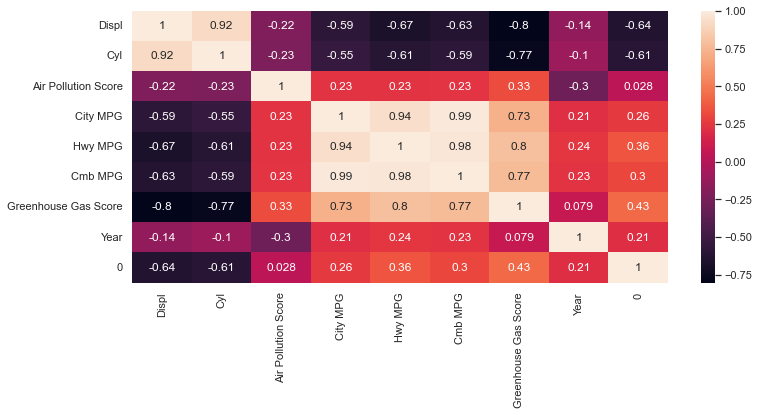

The clustered category has the most correlation with displacement, cylinders, and Green House Gas Score
-----------------------------------------
Inertia: 	 216522.11
-----------------------------------------

Average displacement in clusters: 
Cluster 1: 	 4.95
Cluster 2: 	 2.06
Cluster 3: 	 2.81
-----------------------------------------

Average cylinders in clusters:
Cluster 1: 	 7.93
Cluster 2: 	 4.18
Cluster 2: 	 5.11
-----------------------------------------

Average cylinders in clusters:
Cluster 1: 	 2.86
Cluster 2: 	 7.47
Cluster 2: 	 5.12


In [40]:
# Feature selection using PCA 
from sklearn.decomposition import PCA

# fit and transform PCA 
pca= PCA(n_components=10) 
pca.fit(clustering_dataset) 
clustering_dataset_pca = pd.DataFrame(pca.transform(clustering_dataset))

# Training the model
kmeans_pca = KMeans(n_clusters = 3, init='k-means++',n_init=10, random_state =42) 
kmeans_pca.fit(clustering_dataset_pca) 

# Predict the data on the same dataset
y_pred_pca = kmeans_pca.predict(clustering_dataset_pca) 
clustering_dataset_cluster_pca = pd.concat ([pd.DataFrame(clustering_dataset_pca), pd.DataFrame(y_pred_pca)], axis = 1)

# Add the predicted data to the original dataset
kmeans_out_dataset_pca = master_dataset.copy( ) 
kmeans_out_dataset_pca= pd.concat([kmeans_out_dataset_pca,pd.DataFrame (y_pred_pca)], axis = 1)

sns. set(rc = {'figure.figsize' : (12,5) }) 
sns. heatmap (kmeans_out_dataset_pca. corr(), annot=True)
plt.show()

# Printing relevant data
print('The clustered category has the most correlation with displacement, cylinders, and Green House Gas Score')
print('-----------------------------------------')

# Printing relevant data
print('Inertia: \t', round(kmeans_pca.inertia_,2)) 
print('-----------------------------------------')
print('') 
print('Average displacement in clusters: ') 
print('Cluster 1: \t', round(np.mean(kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[: ,0]== 0].iloc[:, 1]),2)) 
print('Cluster 2: \t', round(np.mean(kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[ : ,0] == 1].iloc[ : ,1]),2))
print('Cluster 3: \t', round(np.mean(kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[:,0] == 2]. iloc[ :, 1]),2)) 
print('-----------------------------------------')
print('') 
print( 'Average cylinders in clusters:') 
print('Cluster 1: \t', round(np.mean(kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[:,0] == 0]. iloc[ :,2]),2)) 
print('Cluster 2: \t', round(np.mean (kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[: ,0] == 1]. iloc[ : ,2]),2))
print('Cluster 2: \t', round(np.mean (kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[: ,0] == 2]. iloc[ : ,2]),2)) 
print('-----------------------------------------')
print('') 
print( 'Average cylinders in clusters:') 
print('Cluster 1: \t', round(np.mean(kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[:,0] == 0]. iloc[ :,13]),2)) 
print('Cluster 2: \t', round(np.mean (kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[: ,0] == 1]. iloc[ : ,13]),2))
print('Cluster 2: \t', round(np.mean (kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[: ,0] == 2]. iloc[ : ,13]),2)) 




In [41]:
kmeans_out_dataset_pca.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Year,0
0,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,U2,8HNXT03.7PKR,SUV,7.0,15.0,20.0,17.0,4.0,No,2008,0
1,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,B5,8HNXT03.7PKR,SUV,6.0,15.0,20.0,17.0,4.0,No,2008,0
2,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,U2,8HNXT02.3DKR,SUV,7.0,17.0,22.0,19.0,5.0,No,2008,2
3,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,B5,8HNXT02.3DKR,SUV,6.0,17.0,22.0,19.0,5.0,No,2008,2
4,ACURA RL,3.5,6.0,Auto-S5,4WD,Gasoline,U2,8HNXV03.5HKR,midsize car,7.0,16.0,24.0,19.0,5.0,No,2008,2


## Classification

Build a Classification model to predict the SmartWay of a car.

In [42]:
classification_dataset = master_dataset. copy() 
classification_dataset = classification_dataset. loc[:, [ 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Veh Class','Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG','Greenhouse Gas Score', 'SmartWay' , 'Year' ]]

# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# creating one hot encoder object 
onehotencoder = OneHotEncoder () 
labelencoder = LabelEncoder () 
standardscaler = StandardScaler( )

# Apply label encoder to features Trans and SmartWay
classification_dataset.loc[ :, 'Trans'] = labelencoder.fit_transform(classification_dataset. loc[ : , 'Trans' ]) 
classification_dataset.loc[ :, 'SmartWay'] = labelencoder.fit_transform(classification_dataset. loc[ : , 'SmartWay' ])
classification_dataset.loc[ :, 'Drive'] = labelencoder.fit_transform(classification_dataset. loc[ : , 'Drive' ])
classification_dataset.loc[ :, 'Fuel'] = labelencoder.fit_transform(classification_dataset. loc[ : , 'Fuel' ])
classification_dataset.loc[ :, 'Veh Class'] = labelencoder.fit_transform(classification_dataset. loc[ : , 'Veh Class' ])

In [43]:
# Divide dependent variable and independent variables 
y = classification_dataset.loc[:, 'SmartWay' ] 
X = classification_dataset.drop('SmartWay',axis = 1) 
y = labelencoder.fit_transform(y)

In [44]:
# Balancing the dataset 
from imblearn.over_sampling import SMOTE 
classification_dataset_balanced = master_dataset. copy()

oversample = SMOTE()
X, y = oversample.fit_resample(X,y)
pd.DataFrame(y).value_counts()

0    20534
1    20534
2    20534
dtype: int64

In [45]:
# Split the dataset to train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [46]:
# Grid Search for hyper parameter tuning
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.model_selection import GridSearchCV 
def classification_eval (algorithm, grid_params, X_train, X_test, y_train, y_test) : 
    model = GridSearchCV(algorithm, grid_params, n_jobs = - 1, cv = 5, verbose = 1) 
    model. fit(X_train, y_train) 
    y_pred = model. predict (X_test) 
    print('confusion_matrix /t', confusion_matrix(y_pred,y_test) ) 
    print("accuracy_score \t", accuracy_score(y_test, y_pred) ) 
    print("Grid Search Best Score: \t", model.best_score_) 
    print("Grid Search Best Params: \t", model.best_params_) 
    return model


### KNN

In [47]:
# Classification using KNN
from sklearn.neighbors import KNeighborsClassifier 
grid_params = {'n_neighbors' : [5,10], 'p':[1,2], 'metric' : [ 'minkowski' ]}

classification_eval(KNeighborsClassifier(),grid_params,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
confusion_matrix /t [[5194    0   32]
 [   0 4938   19]
 [   0  200 5018]]
accuracy_score 	 0.9837023569898059
Grid Search Best Score: 	 0.9819051905422429
Grid Search Best Params: 	 {'metric': 'minkowski', 'n_neighbors': 5, 'p': 1}


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'], 'n_neighbors': [5, 10],
                         'p': [1, 2]},
             verbose=1)

### SVC

In [48]:
# Classification using SVC
from sklearn.svm import SVC 
grid_params = {'C': [0.5,1], 'kernel': ['rbf' ], 'gamma' : [ 'scale']} 

classification_eval(SVC(), grid_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
confusion_matrix /t [[3977    0  341]
 [   0 4334  580]
 [1217  804 4148]]
accuracy_score 	 0.8089734432829037
Grid Search Best Score: 	 0.801367978953197
Grid Search Best Params: 	 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.5, 1], 'gamma': ['scale'], 'kernel': ['rbf']},
             verbose=1)

### Decision Tree

In [29]:
# Classification using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
grid_params = {'max_depth' : [1,5,10], 'min_samples_leaf' : [1,5,10]} 

classification_eval(DecisionTreeClassifier(), grid_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
confusion_matrix /t [[2820  685 1275]
 [ 454 2671  848]
 [1843 1791 3014]]
accuracy_score 	 0.5522368677358613
Grid Search Best Score: 	 0.5434515951169991
Grid Search Best Params: 	 {'max_depth': 5, 'min_samples_leaf': 1}


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'min_samples_leaf': [1, 5, 10]},
             verbose=1)

### Random Forest

In [30]:
# Classification using Random Forest
from sklearn. ensemble import RandomForestClassifier 
grid_params = {'n_estimators' : [10,50, 100], 'max_depth' : [1,5,10], 'min_samples_leaf' : [1,5,10]} 

classification_eval(RandomForestClassifier(), grid_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
confusion_matrix /t [[2666  613 1264]
 [ 608 2743  859]
 [1843 1791 3014]]
accuracy_score 	 0.5469125381468736
Grid Search Best Score: 	 0.5434515951169991
Grid Search Best Params: 	 {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 50}


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

## Regression

In [32]:
regression_dataset = master_dataset.copy()

# import necessary libraries
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression 
from sklearn.preprocessing import LabelEncoder

# divide datasets to dependent and independent datasets
regression_dataset_X = regression_dataset.loc[ :, [ 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Stnd', 'Veh Class', 'Air Pollution Score', 'Greenhouse Gas Score', 'SmartWay', 'Year' ]] 
regression_dataset_y = regression_dataset.loc[ :, 'City MPG'].values

# Apply Label Encoding on categorical features 
le = LabelEncoder( ) 
regression_dataset_X[ 'Trans'] = le.fit_transform(regression_dataset_X[ 'Trans' ]) 
regression_dataset_X[ 'Drive'] = le.fit_transform(regression_dataset_X[ 'Drive' ]) 
regression_dataset_X[ 'Fuel'] = le.fit_transform(regression_dataset_X['Fuel']) 
regression_dataset_X[ 'Stnd'] = le.fit_transform(regression_dataset_X[ 'Stnd' ]) 
regression_dataset_X[ 'Veh Class'] = le.fit_transform(regression_dataset_X[ 'Veh Class' ]) 
regression_dataset_X[ 'SmartWay'] = le.fit_transform(regression_dataset_X[ 'SmartWay' ])

# split the dataset to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(regression_dataset_X, regression_dataset_y)

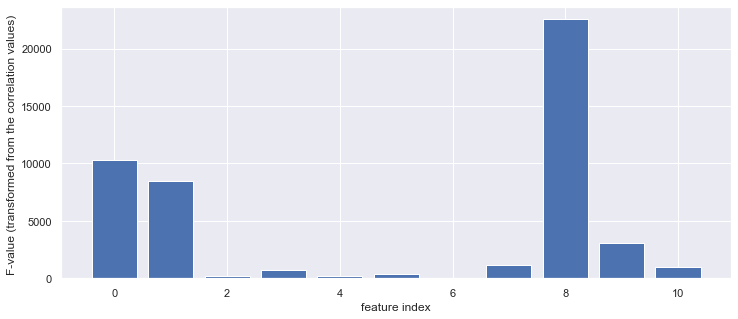

In [33]:
# feature selection  - Method 1
f_selector = SelectKBest(score_func=f_regression, k='all')

# Learn relationship from training data 
f_selector.fit(X_train, y_train)

# transform train input data
X_train_fs = f_selector. transform(X_train)

# transform test input data
X_test_fs = f_selector. transform(X_test)

# Plot the scores for the features 
plt.bar([i for i in range(len(f_selector. scores_ ) )], f_selector. scores_ ) 
plt.xlabel("feature index") 
plt.ylabel("F-value (transformed from the correlation values) ") 
plt.show()


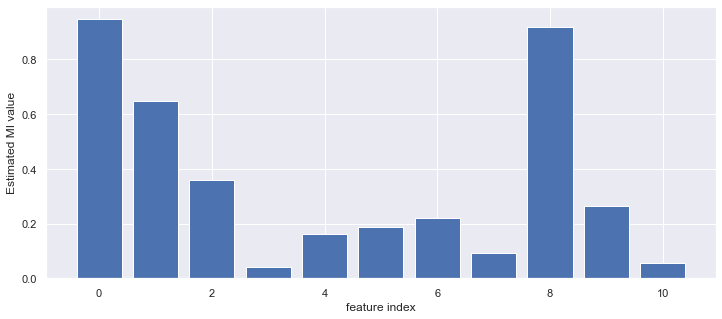

In [34]:
from sklearn.feature_selection import mutual_info_regression

# feature selection - Method 2
f_selector = SelectKBest (score_func=mutual_info_regression, k='all' )

# Learn relationship from training data 
f_selector. fit(X_train, y_train)

# transform train input data
X_train_fs = f_selector. transform(X_train)

# transform test input data
X_test_fs = f_selector. transform(X_test)

# Plot the scores for the features 
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_) 
plt.xlabel("feature index") 
plt.ylabel("Estimated MI value") 
plt. show()


In [36]:
# From feature importance measures; features 'Displ','Cyl','Trans','Greenhouse Gas Score','SmartWay' are the least important, so we will remove those
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

regression_dataset_X = regression_dataset_X. loc[ : , [ 'Displ' , 'Cyl', 'Trans', 'Greenhouse Gas Score', 'SmartWay' ]]


# Split dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(regression_dataset_X, regression_dataset_y)

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [37]:
# Grid Search function:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.model_selection import GridSearchCV 

def regression_eval(algorithm, grid_params, X_train, X_test, y_train, y_test): 
    model = GridSearchCV(algorithm, grid_params, cv=5, n_jobs =- 1, verbose=1) 
    model. fit(X_train, y_train) 
    y_pred = model. predict(X_test) 
    print("R2: \t", r2_score(y_test, y_pred)) 
    print("MSE: \t", mean_squared_error (y_test, y_pred) ) 
    print("Grid Search Best Score: \t", model.best_score_) 
    print("Grid Search Best Params; \t", model. best_params_) 
    return model


### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression 
regression_eval(LinearRegression( ), {}, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
R2: At 0.5589519880999545
MSE: 	 28.986853931498217
Grid Search Best Score: 	 0.536851683234232
Grid Search Best Params; 	 {}


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1, param_grid={},
             verbose=1)

### SVR

In [43]:
from sklearn.svm import SVR 
grid_params = {'C': [0.5, 1], 'kernel' : [ 'rbf' ], 'gamma' : ['scale']} 
regression_eval (SVR(), grid_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
R2: At 0.69577364869766
MSE: 	 19.994568775682723
Grid Search Best Score: 	 0.6579229604412508
Grid Search Best Params; 	 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.5, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']},
             verbose=1)

### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor
grid_params = {'max_depth':[1,5,10], 'min_samples_leaf' : [1,5,10]} 
regression_eval(DecisionTreeRegressor(),grid_params, X_train, X_test, y_train, y_test)  

Fitting 5 folds for each of 9 candidates, totalling 45 fits
R2: At 0.7487588698003453
MSE: 	 16.512238455192012
Grid Search Best Score: 	 0.7528771775985201
Grid Search Best Params; 	 {'max_depth': 10, 'min_samples_leaf': 10}


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'min_samples_leaf': [1, 5, 10]},
             verbose=1)

### Random Forest



In [46]:
from sklearn.ensemble import RandomForestRegressor 
grid_params = {'n_estimators' : [10,50, 100], 'max_depth' : [1,5,10], 'min_samples_leaf' : [1,5,10]} 
regression_eval(RandomForestRegressor(), grid_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
R2: At 0.7468190668446201
MSE: 	 16.639727489075785
Grid Search Best Score: 	 0.7592982513938891
Grid Search Best Params; 	 {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 10}


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=1)